# Digital Image Processing CS663
---
## Final Project
### Dhruv Meena, 22b1279
---

### JPEG Image Compression Engine

In this project I have implemented a compression engine using jpeg algorithm. I have used OpenCV to calculate the DCT coefficients and coded my own huffman coding implementation for more flexibility. The idea for the implementation was inspired from Aashish Barnwal's article on GeeksForGeeks.org



## Libraries + Error Functions

In [ ]:
!pip install huffman
!pip install bitarray
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import heapq
from collections import Counter
from PIL import Image
import huffman
import os
import ast
import bitarray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 17.5 MB/s eta 0:00:00


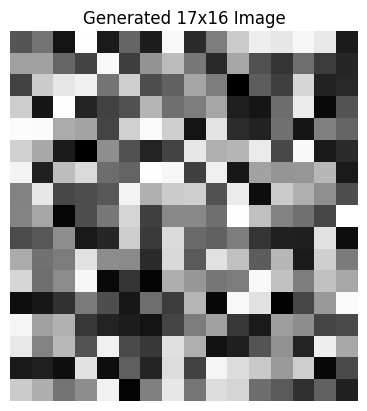

[[ 86 116  20 253  27 101  30 248  44 126 203 238 231 246 232  28]
 [160 161 103  68 249  63 147 187 121  42 166  81  54 111  60  39]
 [ 67 203 230 240 117 207  79  98 165 125   2  94  64 214  35  41]
 [205  22 253  38  67  83 181 111 125 166  32  22 110 235  10  84]
 [252 251 171 164  69 208 250 207  20 227  46  35 115  22 128 101]
 [209 169  28   1 142  83  36  68 230 175 181 234  73 249  26  44]
 [244  34 189 218 110 101 254 246  65 239  24 162 149 150 183  27]
 [130 231  72  78  88 243 176 203 206  83 235  14 203 175 143  79]
 [131 166   7  79 121 213  65 136 137 112 253 192 130 113  71 255]
 [ 76  88 142  26  39 205  59 218 106  99 126  54  33  32 226  14]
 [171 115 125 225 140 138  44 217  90 225 192  93 183  28 207 124]
 [214 112 140 247  10  53   5 174 151 119 125 249 193 126 193 168]
 [ 15  25  51 124  79  24 111  62 182   9 248 225   4  71 153 250]
 [245 160 177  56  36  30  20  70 125 161  57  28 157 141  69  75]
 [232 132 184  84 240  75  58 224 175  19  32  85 145  36 238 

In [ ]:
# Generate a 16x16 grayscale image with random pixel values (0-255)
image_17x16 = np.random.randint(0, 256, (17, 16), dtype=np.uint8)

# Display the generated image
plt.imshow(image_17x16, cmap='gray')
plt.title("Generated 17x16 Image")
plt.axis("off")
plt.show()

# Print the array if needed
print(image_17x16)


In [ ]:
# Mean Squared Error function
def rmse(compressed, original):
  assert len(compressed) == len(original), "The compressed image and the original image are not of the same size!"
  return np.sqrt(np.mean((compressed-original)**2))

def calculate_bpp(file_path, rows, cols):
    compressed_size = os.stat(file_path).st_size * 8
    num_pixels = rows * cols
    bpp = compressed_size / num_pixels
    return bpp

##  Encoding

In [ ]:
# Padding
# Padding
def pad(img):
    rows, cols = img.shape[:2]
    pad_bottom = 8 - (rows % 8) if rows % 8 != 0 else 0
    pad_right = 8 - (cols % 8) if cols % 8 != 0 else 0
    padded_img = cv.copyMakeBorder(img, 0, pad_bottom, 0, pad_right, cv.BORDER_CONSTANT, value=128)
    print(f"Original size: ({rows}, {cols}), Padded size: ({padded_img.shape[:2]}), Padding: ({pad_bottom}, {pad_right})")
    return padded_img, pad_bottom, pad_right

# DCT
def DCT(block):

  block = block.astype(np.float32)
  block = block - 128
  block = cv.dct(block)

  return block

In [ ]:
lala1, m,n = pad(image_17x16)
print(lala1)

Original size: (17, 16), Padded size: ((24, 16)), Padding: (7, 0)
[[ 86 116  20 253  27 101  30 248  44 126 203 238 231 246 232  28]
 [160 161 103  68 249  63 147 187 121  42 166  81  54 111  60  39]
 [ 67 203 230 240 117 207  79  98 165 125   2  94  64 214  35  41]
 [205  22 253  38  67  83 181 111 125 166  32  22 110 235  10  84]
 [252 251 171 164  69 208 250 207  20 227  46  35 115  22 128 101]
 [209 169  28   1 142  83  36  68 230 175 181 234  73 249  26  44]
 [244  34 189 218 110 101 254 246  65 239  24 162 149 150 183  27]
 [130 231  72  78  88 243 176 203 206  83 235  14 203 175 143  79]
 [131 166   7  79 121 213  65 136 137 112 253 192 130 113  71 255]
 [ 76  88 142  26  39 205  59 218 106  99 126  54  33  32 226  14]
 [171 115 125 225 140 138  44 217  90 225 192  93 183  28 207 124]
 [214 112 140 247  10  53   5 174 151 119 125 249 193 126 193 168]
 [ 15  25  51 124  79  24 111  62 182   9 248 225   4  71 153 250]
 [245 160 177  56  36  30  20  70 125 161  57  28 157 141  69  

In [ ]:
m0, n0 = lala1.shape[:2]
blocks = []
for i in range(0, m0, 8):
  for j in range(0, n0, 8):
    block = lala1[i:i+8, j:j+8]
    blocks.append(block)
print(blocks)

[array([[ 86, 116,  20, 253,  27, 101,  30, 248],
       [160, 161, 103,  68, 249,  63, 147, 187],
       [ 67, 203, 230, 240, 117, 207,  79,  98],
       [205,  22, 253,  38,  67,  83, 181, 111],
       [252, 251, 171, 164,  69, 208, 250, 207],
       [209, 169,  28,   1, 142,  83,  36,  68],
       [244,  34, 189, 218, 110, 101, 254, 246],
       [130, 231,  72,  78,  88, 243, 176, 203]], dtype=uint8), array([[ 44, 126, 203, 238, 231, 246, 232,  28],
       [121,  42, 166,  81,  54, 111,  60,  39],
       [165, 125,   2,  94,  64, 214,  35,  41],
       [125, 166,  32,  22, 110, 235,  10,  84],
       [ 20, 227,  46,  35, 115,  22, 128, 101],
       [230, 175, 181, 234,  73, 249,  26,  44],
       [ 65, 239,  24, 162, 149, 150, 183,  27],
       [206,  83, 235,  14, 203, 175, 143,  79]], dtype=uint8), array([[131, 166,   7,  79, 121, 213,  65, 136],
       [ 76,  88, 142,  26,  39, 205,  59, 218],
       [171, 115, 125, 225, 140, 138,  44, 217],
       [214, 112, 140, 247,  10,  53, 

In [ ]:
dct_blocks = []
for block in blocks:
  block = DCT(block)
  dct_blocks.append(block)
print(dct_blocks)

[array([[ 119.125    ,    6.7249956,  141.8649   ,  -18.14807  ,
          19.375    ,   19.912718 ,   23.364147 ,  -40.352734 ],
       [ -68.38049  ,   15.536879 , -106.282394 ,  -97.71819  ,
          64.32972  ,  -43.17139  ,   -7.7456107,  -36.0938   ],
       [ -32.54698  , -112.341255 ,   -5.3221517,  -31.836092 ,
         105.60845  ,  -69.598564 ,  -55.018738 , -123.23365  ],
       [ -68.52818  ,   22.068096 ,   88.92175  ,   28.86307  ,
         130.81804  ,   -1.2651948,  -44.910866 ,  -44.93117  ],
       [  15.375    ,  -48.934944 ,   87.40641  ,  -23.027426 ,
         -64.875    ,   41.81674  ,   31.038694 ,  -95.69826  ],
       [ -61.198334 ,  -19.289536 ,  -44.17329  , -106.90911  ,
          64.55795  ,  171.95648  ,  100.51121  ,   17.462914 ],
       [-120.05874  ,   73.3791   ,  -85.51874  ,   27.840246 ,
         -56.327263 , -126.88336  ,    1.5721459, -163.90874  ],
       [ 193.94865  ,  -28.737722 ,  -52.146435 ,  -94.72341  ,
         -31.810495 ,   76.00253

In [ ]:
# Quantization Matrix
M = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

# Quantization
def quantize(block, Q):

  if Q <= 0 or Q > 100:
        raise ValueError("Quality factor Q must be in the range 1–100.")

  M_ = (50/Q) * M
  block = np.round(block/M_)
  return block.astype('int')

In [ ]:
quantized_blocks = []
for block in dct_blocks:
  block = quantize(block,75)
  quantized_blocks.append(block)
print(quantized_blocks)

[array([[ 11,   1,  21,  -2,   1,   1,   1,  -1],
       [ -9,   2, -11,  -8,   4,  -1,   0,  -1],
       [ -3, -13,   0,  -2,   4,  -2,  -1,  -3],
       [ -7,   2,   6,   1,   4,   0,  -1,  -1],
       [  1,  -3,   4,  -1,  -1,   1,   0,  -2],
       [ -4,  -1,  -1,  -3,   1,   2,   1,   0],
       [ -4,   2,  -2,   0,  -1,  -2,   0,  -2],
       [  4,   0,  -1,  -1,   0,   1,   0,  -3]]), array([[ -7,  13, -14,  16,  -8,  -2,   0,  -2],
       [ -7,  -6,  -7,  -1,   0,   1,   1,  -1],
       [ 16,  -5, -12,  -1,  -1,   3,   1,   4],
       [ 12,   1,  -8,  -5,  -1,   1,  -2,  -1],
       [  4,  -6,   0,   0,  -1,  -1,   0,   3],
       [  5,  -2,  -2,   2,   0,   0,  -1,  -2],
       [  3,   1,  -1,   1,   0,   1,   2,  -1],
       [ -1,  -1,   0,   0,   0,   0,  -3,   0]]), array([[-13,   6,  12,  -8,  10,  -1,   3,  -3],
       [  5,  -6,   1,   6,  -5,  -1,   1,  -2],
       [  3, -15,   2,   4,  -1,  -3,   1,  -1],
       [ -7,   8,   3,   6,  -3,  -1,  -1,   3],
       [-11,  -

In [ ]:
# Zigzag ordering
zigzag_indices = np.array([
      (0, 0), (0, 1), (1, 0), (2, 0), (1, 1), (0, 2), (0, 3), (1, 2),
      (2, 1), (3, 0), (4, 0), (3, 1), (2, 2), (1, 3), (0, 4), (0, 5),
      (1, 4), (2, 3), (3, 2), (4, 1), (5, 0), (6, 0), (5, 1), (4, 2),
      (3, 3), (2, 4), (1, 5), (0, 6), (0, 7), (1, 6), (2, 5), (3, 4),
      (4, 3), (5, 2), (6, 1), (7, 0), (7, 1), (6, 2), (5, 3), (4, 4),
      (3, 5), (2, 6), (1, 7), (2, 7), (3, 6), (4, 5), (5, 4), (6, 3),
      (7, 2), (7, 3), (6, 4), (5, 5), (4, 6), (3, 7), (4, 7), (5, 6),
      (6, 5), (7, 4), (7, 5), (6, 6), (5, 7), (6, 7), (7, 6), (7, 7)
  ])

def zigzag(block):
  zig_block = []
  zig_block = [block[x, y] for x, y in zigzag_indices]
  return zig_block

In [ ]:
zigzagged_blocks = []
for block in quantized_blocks:
  block = zigzag(block)
  zigzagged_blocks.append(block)
print(zigzagged_blocks)

[[11, 1, -9, -3, 2, 21, -2, -11, -13, -7, 1, 2, 0, -8, 1, 1, 4, -2, 6, -3, -4, -4, -1, 4, 1, 4, -1, 1, -1, 0, -2, 4, -1, -1, 2, 4, 0, -2, -3, -1, 0, -1, -1, -3, -1, 1, 1, 0, -1, -1, -1, 2, 0, -1, -2, 1, -2, 0, 1, 0, 0, -2, 0, -3], [-7, 13, -7, 16, -6, -14, 16, -7, -5, 12, 4, 1, -12, -1, -8, -2, 0, -1, -8, -6, 5, 3, -2, 0, -5, -1, 1, 0, -2, 1, 3, -1, 0, -2, 1, -1, -1, -1, 2, -1, 1, 1, -1, 4, -2, -1, 0, 1, 0, 0, 0, 0, 0, -1, 3, -1, 1, 0, 0, 2, -2, -1, -3, 0], [-13, 6, 5, 3, -6, 12, -8, 1, -15, -7, -11, 8, 2, 6, 10, -1, -5, 4, 3, -5, 11, 0, 6, -3, 6, -1, -1, 3, -3, 1, -3, -3, 0, 1, 2, 0, -2, 0, 1, 0, -1, 1, -2, -1, -1, 1, 2, 0, -1, 1, 0, -1, -1, 3, -3, 0, 0, 0, 0, 0, 0, -1, -1, 1], [3, 1, 3, -3, 0, 2, -10, 4, 6, -6, 14, -4, -5, -7, 1, 2, -2, 0, 6, 2, 5, 2, -4, -4, 0, -2, 1, -1, 2, 0, -2, 3, -4, 0, 2, 1, -1, -2, 1, 2, 1, 1, 2, -1, 2, 0, 2, 0, 1, -2, -1, 0, 2, 0, -2, -1, -3, 1, 1, 0, 1, -1, 1, 1], [3, 1, 5, 4, 2, 3, -1, 3, 1, 3, 2, 1, 3, -2, 3, -1, 4, -1, 2, 1, 1, 0, 0, 1, -1, 2, -1, -1, 1,

In [ ]:
def rle(zig_block):
    rle = []
    zero_count = 0

    for value in zig_block:
        if value == 0:
            zero_count += 1
            if zero_count > 15:
              rle.append((15,0))
              zero_count = 0
        else:
            rle.append((zero_count, value))
            zero_count = 0

    rle.append((0, 0))
    return rle

In [ ]:
rle_blocks = []
dc_coffs = []
for block in zigzagged_blocks:
  ac_coff = block[1:]
  dc_coff = block[0]
  dc_coffs.append(dc_coff)
  block = rle(ac_coff)
  rle_blocks.append(block)
print(rle_blocks)
print(dc_coffs)

[[(0, 1), (0, -9), (0, -3), (0, 2), (0, 21), (0, -2), (0, -11), (0, -13), (0, -7), (0, 1), (0, 2), (1, -8), (0, 1), (0, 1), (0, 4), (0, -2), (0, 6), (0, -3), (0, -4), (0, -4), (0, -1), (0, 4), (0, 1), (0, 4), (0, -1), (0, 1), (0, -1), (1, -2), (0, 4), (0, -1), (0, -1), (0, 2), (0, 4), (1, -2), (0, -3), (0, -1), (1, -1), (0, -1), (0, -3), (0, -1), (0, 1), (0, 1), (1, -1), (0, -1), (0, -1), (0, 2), (1, -1), (0, -2), (0, 1), (0, -2), (1, 1), (2, -2), (1, -3), (0, 0)], [(0, 13), (0, -7), (0, 16), (0, -6), (0, -14), (0, 16), (0, -7), (0, -5), (0, 12), (0, 4), (0, 1), (0, -12), (0, -1), (0, -8), (0, -2), (1, -1), (0, -8), (0, -6), (0, 5), (0, 3), (0, -2), (1, -5), (0, -1), (0, 1), (1, -2), (0, 1), (0, 3), (0, -1), (1, -2), (0, 1), (0, -1), (0, -1), (0, -1), (0, 2), (0, -1), (0, 1), (0, 1), (0, -1), (0, 4), (0, -2), (0, -1), (1, 1), (5, -1), (0, 3), (0, -1), (0, 1), (2, 2), (0, -2), (0, -1), (0, -3), (0, 0)], [(0, 6), (0, 5), (0, 3), (0, -6), (0, 12), (0, -8), (0, 1), (0, -15), (0, -7), (0, -

In [ ]:
def huffman_encode_dc(DC_coeffs):
    dc_differences = [DC_coeffs[0]] + [DC_coeffs[i] - DC_coeffs[i - 1] for i in range(1, len(DC_coeffs))] # set-up differences
    freq = Counter(dc_differences)
    huffman_dict = huffman.codebook(freq.items())
    encoded_data = "".join(huffman_dict[diff] for diff in dc_differences)
    return encoded_data, huffman_dict

def huffman_encode_ac(blocks_rle):
    RLE = [item for block in blocks_rle for item in block] # flatten
    frequency = Counter(RLE)
    huffman_dict = huffman.codebook(frequency.items())
    encoded_data = "".join(huffman_dict[tuple] for tuple in RLE)
    return encoded_data, huffman_dict

In [ ]:
encodc, huffdc = huffman_encode_dc(dc_coffs)
print(encodc)
print(huffdc)
encodac, huffac = huffman_encode_ac(rle_blocks)
print(encodac)
print(huffac)

1001011110100110
{11: '100', -18: '101', -6: '111', 16: '01', 0: '00', -4: '110'}
110011100001111010110111011110010101001010110111110011101011010111011101101110110011110001111011111011111000111011101110100110001010011101000010111110110100111100010000001111000110110100000000101110000100111010010111110001101010101011111110101110011100101101111000100111010001101111110010110000110010111011100110011100100011110011000010001111000101010110100100101100110001101010011001000010100110000000101100110110001110110010001111010111101000011001010001001001111011111111100010101101001000100110010100011111001011010111001010100101011001101111100001011000000110001110101000110001000110001010111111011100000000100111101101111011110011111011101000111110000110100100001101011100001101000000010011110010101000011011111111001001111010101001101011111011110001000100110101011111001100011100111010111001010101110111010111011111110111110101001100010111010001001111101010101100010011101011110110101100101110101001111100100101

In [ ]:
# JPEG Compression
def jpeg_compression(img_path,Q):

    load_image = cv.imread(img_path, cv.IMREAD_GRAYSCALE) # Load Image
    img = np.array(load_image) # Convert to np.array() for better handling
    img, pad1, pad2 = pad(img) # Pad the image, also unpack the padding lengths

    rows, cols = img.shape[:2] # Get dimensions of the padded image
    #print(f"Padded image size: {rows}x{cols}, Padding: {pad1}, {pad2}")

    blocks = [] # Initialize the blocks list

    # get separate blocks
    for i in range(0, rows, 8):
      for j in range(0, cols, 8):
        block = img[i:i+8, j:j+8] # get individual blocks 8x8
        blocks.append(block) # append each 8x8 as a list to blocks

    #print(f"Number of 8x8 blocks: {len(blocks)}, Expected blocks: {(rows // 8) * (cols // 8)}")

    blocks_dct = [DCT(block) for block in blocks]

    # quantize
    blocks_quantize = [quantize(block,Q) for block in blocks_dct]

    # zigzag ordering
    blocks_zigzag = [zigzag(block) for block in blocks_quantize]

    # get dc and ac coefficients
    DC_coefficients = [DC[0] for DC in blocks_zigzag]
    AC_coefficients = [AC[1:] for AC in blocks_zigzag]

    # get huffman dicts
    encoded_data_DC, huffman_dict_DC = huffman_encode_dc(DC_coefficients)
    RLE_encoded_blocks = [rle(block) for block in AC_coefficients]
    encoded_data_AC, huffman_dict_AC = huffman_encode_ac(RLE_encoded_blocks)

    return encoded_data_DC, encoded_data_AC, huffman_dict_DC, huffman_dict_AC, Q, rows, cols, pad1, pad2

In [ ]:
import pickle
import struct

def write_compressed_file(filename, rows, cols, pad_bottom, pad_right, Q, bitstreamDC, bitstreamAC, dc_huffman_codes, ac_huffman_codes):
    data = {
        "rows": rows,
        "cols": cols,
        "pad_bottom": pad_bottom,
        "pad_right": pad_right,
        "Q": Q,
        "bitstreamDC": bitstreamDC,
        "bitstreamAC": bitstreamAC,
        "dc_huffman_codes": dc_huffman_codes,
        "ac_huffman_codes": ac_huffman_codes
    }
    with open(filename, 'wb') as file:
        pickle.dump(data, file)
    print(f"Compressed data written to {filename}")

def write_compressed_bitstream(filename, bitstreamDC, bitstreamAC, dict1, dict2, rows, cols, Q):
    # Convert DC and AC bitstreams into bitarrays
    ba_dc = bitarray.bitarray()
    ba_ac = bitarray.bitarray()
    ba_dc.extend(bitstreamDC)  # Convert DC string to bitarray
    ba_ac.extend(bitstreamAC)  # Convert AC string to bitarray

    with open(filename, 'wb') as file:
        # Write header (rows, cols, Q) using struct
        file.write(struct.pack('>HHB', rows, cols, Q))

        # Serialize and write Huffman dictionaries (dict1 and dict2) using pickle
        pickle.dump(dict1, file)  # Save DC Huffman dictionary
        pickle.dump(dict2, file)  # Save AC Huffman dictionary

        # Write DC and AC bitstreams to the file
        ba_dc.tofile(file)
        ba_ac.tofile(file)

    print(f"Bitstreams written to {filename}")

def read_compressed_file(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    print(f"Compressed data read from {filename}")
    return data

In [ ]:
write_compressed_file('compressed_Q75', m0, n0, m, n, 75, encodc, encodac, huffdc, huffac)

Compressed data written to compressed_Q75


In [ ]:
data75 = read_compressed_file('compressed_Q75')

Compressed data read from compressed_Q75


In [ ]:
# Example input image
img_0 = np.array([
    [200, 202, 189, 188, 189, 175, 175, 175, 220, 221, 230, 231, 232, 233, 234, 235],
    [200, 203, 198, 188, 189, 182, 178, 175, 220, 225, 228, 231, 232, 233, 234, 235],
    [203, 200, 200, 195, 200, 187, 185, 175, 223, 222, 228, 230, 230, 234, 234, 235],
    [200, 200, 200, 200, 197, 187, 187, 187, 220, 221, 229, 229, 230, 233, 233, 234],
    [200, 205, 200, 200, 195, 188, 187, 175, 225, 224, 227, 226, 230, 232, 232, 233],
    [200, 200, 200, 200, 200, 190, 187, 175, 220, 220, 225, 224, 229, 231, 231, 232],
    [205, 200, 199, 200, 191, 187, 187, 175, 215, 215, 223, 222, 227, 230, 230, 231],
    [210, 200, 200, 200, 188, 185, 187, 186, 210, 210, 220, 220, 226, 228, 228, 229],
])

blocks=[]
for i in range(0, 8, 8):
  for j in range(0, 16, 8):
    block = img_0[i:i+8, j:j+8] # get individual blocks 8x8
    blocks.append(block) # append each 8x8 as a list to blocks

# compute dct coefficients
blocks_dct = [DCT(block) for block in blocks]
print(blocks_dct)
# quantize
blocks_quantize = [quantize(block,50) for block in blocks_dct]
print(blocks_quantize)
# zigzag ordering
blocks_zigzag = [zigzag(block) for block in blocks_quantize]
# get dc and ac coefficients
DC_coefficients = [DC[0] for DC in blocks_zigzag]
AC_coefficients = [AC[1:] for AC in blocks_zigzag]

# get huffman codes for ac and dc
encoded_data_DC, huffman_dict_DC = huffman_encode_dc(DC_coefficients)
blocks_rle = [rle(block) for block in AC_coefficients]
encoded_data_AC, huffman_dict_AC = huffman_encode_ac(blocks_rle)

print("BitstreamDC:", encoded_data_DC)
print("BitstreamAC:", encoded_data_AC)
print("DC Huffman Codes:", huffman_dict_DC)
print("AC Huffman Codes:", huffman_dict_AC)

[array([[ 5.1487500e+02,  6.5016937e+01, -1.1819918e+01,  3.5716321e+00,
         1.3750000e+00,  2.2530947e+00, -7.9574375e+00,  4.8890295e+00],
       [-1.5891041e+01,  3.4146259e+00,  1.9508936e+00,  3.7082630e-01,
        -2.1788707e-01, -1.1213462e+01, -2.0504699e+00,  3.3166850e+00],
       [-1.2341883e+01,  6.3602471e+00,  1.1473797e+01, -7.7182549e-01,
         3.0798736e+00,  4.2452323e-01,  1.2777281e+00, -1.8869140e+00],
       [-7.7629452e+00,  2.6106453e+00, -4.4276428e+00,  2.3042107e+00,
        -2.3899498e+00, -2.5522892e+00, -4.6448703e+00, -1.5002497e+00],
       [ 3.7500000e-01, -2.0596254e+00,  6.5512214e+00, -5.3506398e+00,
         4.3750000e+00, -4.7413549e-01, -1.4959134e+00, -3.5484219e+00],
       [ 1.2189508e-01, -3.0049543e+00, -7.5591683e-01,  3.1903058e-01,
         4.1585989e+00,  1.1957889e+00, -1.1196241e+00,  2.6229620e-01],
       [ 2.5414937e+00, -1.5842034e+00, -3.2222714e+00,  3.0395856e+00,
         3.1891427e+00, -6.5972126e-01, -7.2379613e-01,  

## Decoding

In [ ]:
# Inverse DCT
def idct(zig,Q):

  if zig.shape != (8, 8):
    raise ValueError("Input zig must be an 8x8 matrix.")
  if Q <= 0 or Q > 100:
    raise ValueError("Quality factor Q must be in the range 1–100.")

  M_ = float(50/Q) * M

  zig = zig*M_
  zig = cv.idct(zig)
  zig = zig + 128
  return np.clip(zig, 0, 255).astype(np.uint8)

In [ ]:
def huffman_decode(bitstream, huff_codes):
  reversed_dict = {symbol: key for key, symbol in huff_codes.items()}
  decoded_block = []

  temp = ""
  decoded_blocks = []

  for bit in bitstream:
        temp += bit
        if temp in reversed_dict:
            symbol = reversed_dict[temp]
            decoded_block.append(symbol)
            temp = ""

            if symbol == (0, 0):
                decoded_blocks.append(decoded_block)
                decoded_block = []
  if decoded_block:
    if decoded_block[-1] != (0, 0):
      decoded_block.append((0, 0))
    decoded_blocks.append(decoded_block)
  return decoded_blocks

In [ ]:
def huffman_decode_dc(bitstream, huff_codes):
    reversed_dict = {symbol: key for key, symbol in huff_codes.items()}

    decoded_sequence = []
    temp = ""

    for bit in bitstream:
        temp += bit
        if temp in reversed_dict:
            decoded_sequence.append(int(reversed_dict[temp]))
            temp = ""

    for i in range(1,len(decoded_sequence)):
        decoded_sequence[i] += decoded_sequence[i-1]
    return decoded_sequence

In [ ]:
def inverse_rle(decoded_AC, decodedDC):
    decoded_blocks_ = []

    for block in decoded_AC:
        block_curr = []
        for runlength, value in block:
            if (runlength, value) == (0, 0):
                break
            block_curr.extend([0] * runlength)
            block_curr.append(value)

        while len(block_curr) < 63:
            block_curr.append(0)

        decoded_blocks_.append(block_curr)

    decoded_blocks = [[decodedDC[i]] + decoded_blocks_[i] for i in range(len(decodedDC))]
    return decoded_blocks

In [ ]:
def zigzag_rev(decoded_blocks):
    results = []
    for block in decoded_blocks:
        result = np.zeros((8, 8), dtype=np.float32)
        for idx, (row, col) in enumerate(zigzag_indices):
            result[row, col] = block[idx]
        results.append(result)
    return results

In [ ]:
def reconstruct_image(blocks, padded_shape, original_shape, block_size=8):
    reconstructed_image = np.zeros(padded_shape, dtype=np.float32)
    i, j = 0, 0

    for block in blocks:
        reconstructed_image[i:i+block_size, j:j+block_size] = block
        j += block_size
        if j >= padded_shape[1]:
            j = 0
            i += block_size

    original_rows, original_cols = original_shape
    reconstructed_image_cropped = reconstructed_image[:original_rows, :original_cols]

    return reconstructed_image_cropped.astype(np.uint8)

In [ ]:
def jpeg_decode(file_path):
  data = read_compressed_file(file_path)
  rows = data["rows"]
  cols = data["cols"]
  pad_bottom = data["pad_bottom"]
  pad_right = data["pad_right"]
  Q = data["Q"]
  bitstreamDC = data["bitstreamDC"]
  bitstreamAC = data["bitstreamAC"]
  dc_huffman_codes = data["dc_huffman_codes"]
  ac_huffman_codes = data["ac_huffman_codes"]

  decodedAC = huffman_decode(bitstreamAC, ac_huffman_codes)
  decodedDC = huffman_decode_dc(bitstreamDC, dc_huffman_codes)

  decoded_blocks = inverse_rle(decodedAC,decodedDC)

  zigzagged_blocks = zigzag_rev(decoded_blocks)

  restored_blocks = [idct(block_zig,Q) for block_zig in zigzagged_blocks]

  restored_image = reconstruct_image(restored_blocks, (rows, cols), (rows-pad_bottom, cols-pad_right))

  return restored_image

In [ ]:
rows75 = data75["rows"]
cols75 = data75["cols"]
pad_b75 = data75["pad_bottom"]
pad_r75 = data75["pad_right"]
Q75 = data75["Q"]
bitsDC75 = data75["bitstreamDC"]
bitsAC75 = data75["bitstreamAC"]
dc_huff75 = data75["dc_huffman_codes"]
ac_huff75 = data75["ac_huffman_codes"]

In [ ]:
decodedac75 = huffman_decode(bitsAC75, ac_huff75)
decodeddc75 = huffman_decode_dc(bitsDC75, dc_huff75)
print(decodedac75)
print(decodeddc75)

[[(0, 1), (0, -9), (0, -3), (0, 2), (0, 21), (0, -2), (0, -11), (0, -13), (0, -7), (0, 1), (0, 2), (1, -8), (0, 1), (0, 1), (0, 4), (0, -2), (0, 6), (0, -3), (0, -4), (0, -4), (0, -1), (0, 4), (0, 1), (0, 4), (0, -1), (0, 1), (0, -1), (1, -2), (0, 4), (0, -1), (0, -1), (0, 2), (0, 4), (1, -2), (0, -3), (0, -1), (1, -1), (0, -1), (0, -3), (0, -1), (0, 1), (0, 1), (1, -1), (0, -1), (0, -1), (0, 2), (1, -1), (0, -2), (0, 1), (0, -2), (1, 1), (2, -2), (1, -3), (0, 0)], [(0, 13), (0, -7), (0, 16), (0, -6), (0, -14), (0, 16), (0, -7), (0, -5), (0, 12), (0, 4), (0, 1), (0, -12), (0, -1), (0, -8), (0, -2), (1, -1), (0, -8), (0, -6), (0, 5), (0, 3), (0, -2), (1, -5), (0, -1), (0, 1), (1, -2), (0, 1), (0, 3), (0, -1), (1, -2), (0, 1), (0, -1), (0, -1), (0, -1), (0, 2), (0, -1), (0, 1), (0, 1), (0, -1), (0, 4), (0, -2), (0, -1), (1, 1), (5, -1), (0, 3), (0, -1), (0, 1), (2, 2), (0, -2), (0, -1), (0, -3), (0, 0)], [(0, 6), (0, 5), (0, 3), (0, -6), (0, 12), (0, -8), (0, 1), (0, -15), (0, -7), (0, -

In [ ]:
invrle = inverse_rle(decodedac75,decodeddc75)
print(invrle)

[[11, 1, -9, -3, 2, 21, -2, -11, -13, -7, 1, 2, 0, -8, 1, 1, 4, -2, 6, -3, -4, -4, -1, 4, 1, 4, -1, 1, -1, 0, -2, 4, -1, -1, 2, 4, 0, -2, -3, -1, 0, -1, -1, -3, -1, 1, 1, 0, -1, -1, -1, 2, 0, -1, -2, 1, -2, 0, 1, 0, 0, -2, 0, -3], [-7, 13, -7, 16, -6, -14, 16, -7, -5, 12, 4, 1, -12, -1, -8, -2, 0, -1, -8, -6, 5, 3, -2, 0, -5, -1, 1, 0, -2, 1, 3, -1, 0, -2, 1, -1, -1, -1, 2, -1, 1, 1, -1, 4, -2, -1, 0, 1, 0, 0, 0, 0, 0, -1, 3, -1, 1, 0, 0, 2, -2, -1, -3, 0], [-13, 6, 5, 3, -6, 12, -8, 1, -15, -7, -11, 8, 2, 6, 10, -1, -5, 4, 3, -5, 11, 0, 6, -3, 6, -1, -1, 3, -3, 1, -3, -3, 0, 1, 2, 0, -2, 0, 1, 0, -1, 1, -2, -1, -1, 1, 2, 0, -1, 1, 0, -1, -1, 3, -3, 0, 0, 0, 0, 0, 0, -1, -1, 1], [3, 1, 3, -3, 0, 2, -10, 4, 6, -6, 14, -4, -5, -7, 1, 2, -2, 0, 6, 2, 5, 2, -4, -4, 0, -2, 1, -1, 2, 0, -2, 3, -4, 0, 2, 1, -1, -2, 1, 2, 1, 1, 2, -1, 2, 0, 2, 0, 1, -2, -1, 0, 2, 0, -2, -1, -3, 1, 1, 0, 1, -1, 1, 1], [3, 1, 5, 4, 2, 3, -1, 3, 1, 3, 2, 1, 3, -2, 3, -1, 4, -1, 2, 1, 1, 0, 0, 1, -1, 2, -1, -1, 1,

In [ ]:
blocks_zagged = zigzag_rev(invrle)
print(blocks_zagged)

[array([[ 11.,   1.,  21.,  -2.,   1.,   1.,   1.,  -1.],
       [ -9.,   2., -11.,  -8.,   4.,  -1.,   0.,  -1.],
       [ -3., -13.,   0.,  -2.,   4.,  -2.,  -1.,  -3.],
       [ -7.,   2.,   6.,   1.,   4.,   0.,  -1.,  -1.],
       [  1.,  -3.,   4.,  -1.,  -1.,   1.,   0.,  -2.],
       [ -4.,  -1.,  -1.,  -3.,   1.,   2.,   1.,   0.],
       [ -4.,   2.,  -2.,   0.,  -1.,  -2.,   0.,  -2.],
       [  4.,   0.,  -1.,  -1.,   0.,   1.,   0.,  -3.]], dtype=float32), array([[ -7.,  13., -14.,  16.,  -8.,  -2.,   0.,  -2.],
       [ -7.,  -6.,  -7.,  -1.,   0.,   1.,   1.,  -1.],
       [ 16.,  -5., -12.,  -1.,  -1.,   3.,   1.,   4.],
       [ 12.,   1.,  -8.,  -5.,  -1.,   1.,  -2.,  -1.],
       [  4.,  -6.,   0.,   0.,  -1.,  -1.,   0.,   3.],
       [  5.,  -2.,  -2.,   2.,   0.,   0.,  -1.,  -2.],
       [  3.,   1.,  -1.,   1.,   0.,   1.,   2.,  -1.],
       [ -1.,  -1.,   0.,   0.,   0.,   0.,  -3.,   0.]], dtype=float32), array([[-13.,   6.,  12.,  -8.,  10.,  -1.,   3.,  -3

In [ ]:
restored75 = [idct(block_zi,Q75) for block_zi in blocks_zagged]
print(restored75)

[array([[ 82, 122,  22, 255,  24,  79,  25, 255],
       [178, 128, 113,  61, 239,  86, 159, 187],
       [ 59, 210, 237, 228, 127, 219,  43,  88],
       [187,  28, 248,  43,  45,  68, 206, 120],
       [255, 234, 150, 195,  61, 209, 244, 191],
       [180, 171,  60,   0, 153,  75,  40,  68],
       [247,  47, 172, 219, 107, 123, 243, 251],
       [134, 221,  82,  75,  88, 235, 183, 198]], dtype=uint8), array([[ 54, 107, 210, 239, 228, 253, 226,  27],
       [106,  83, 154,  65,  74,  95,  52,  51],
       [161, 117,   0, 117,  42, 225,  33,  25],
       [126, 174,  36,  15, 109, 228,  19,  95],
       [ 32, 237,  28,  31, 122,  26, 135,  77],
       [204, 180, 184, 234,  56, 252,  31,  38],
       [ 79, 247,   5, 185, 164, 125, 186,  29],
       [203,  80, 244,   0, 203, 191, 138,  84]], dtype=uint8), array([[130, 175,  12,  67, 106, 228,  51, 133],
       [ 75,  67, 136,  49,  48, 176,  85, 213],
       [175, 114, 136, 211, 120, 139,  57, 218],
       [210, 135, 119, 255,  19,  61, 

In [ ]:
r75 = reconstruct_image(restored75, (rows75, cols75), (rows75-pad_b75, cols75-pad_r75))
print(r75)

[[ 82 122  22 255  24  79  25 255  54 107 210 239 228 253 226  27]
 [178 128 113  61 239  86 159 187 106  83 154  65  74  95  52  51]
 [ 59 210 237 228 127 219  43  88 161 117   0 117  42 225  33  25]
 [187  28 248  43  45  68 206 120 126 174  36  15 109 228  19  95]
 [255 234 150 195  61 209 244 191  32 237  28  31 122  26 135  77]
 [180 171  60   0 153  75  40  68 204 180 184 234  56 252  31  38]
 [247  47 172 219 107 123 243 251  79 247   5 185 164 125 186  29]
 [134 221  82  75  88 235 183 198 203  80 244   0 203 191 138  84]
 [130 175  12  67 106 228  51 133 134 107 254 191 148 104  78 247]
 [ 75  67 136  49  48 176  85 213 120  95 140  41  11  36 214  22]
 [175 114 136 211 120 139  57 218  70 231 187  86 200  58 197 130]
 [210 135 119 255  19  61   0 171 147 132 131 228 199  98 215 149]
 [ 14  10  39 121  56  28 139  37 189   0 241 218  34  51 144 255]
 [243 180 186  62  62   8   5  83 115 183  44  42 146 141  79  59]
 [237 133 149  87 241  64  74 223 182   0  44  93 136  24 255 

8.449895578888395


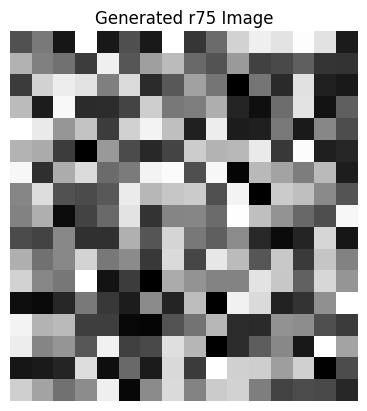

In [ ]:
rmse75 = rmse(r75,image_17x16)
print(rmse75)

plt.imshow(r75, cmap='gray')
plt.title("Generated r75 Image")
plt.axis("off")
plt.show()

## Pipeline

In [ ]:
def engine(image_path,Q, file_path,file_path2):
  encoded_data_DC, encoded_data_AC, huffman_dict_DC, huffman_dict_AC, Q, rows, cols, pad1, pad2 = jpeg_compression(image_path,Q)
  dc_bits = len(encoded_data_DC)  # Size of DC bitstream in bits
  ac_bits = len(encoded_data_AC)  # Size of AC bitstream in bits
  ac_dict = len(huffman_dict_AC)
  dc_dict = len(huffman_dict_DC)

  write_compressed_file(file_path, rows, cols, pad1, pad2, Q, encoded_data_DC, encoded_data_AC, huffman_dict_DC, huffman_dict_AC)
  write_compressed_bitstream(file_path2, encoded_data_DC, encoded_data_AC, huffman_dict_DC, huffman_dict_AC, rows, cols, Q)
  metadata_bits = (os.stat(file_path2).st_size * 8) - (dc_bits + ac_bits + ac_dict + dc_dict)
  print(f"DC: {dc_bits} bits, AC: {ac_bits} bits, DC_dict: {dc_dict} bits, AC_dict: {ac_dict} bits, Metadata: {metadata_bits} bits")
  compressed_image = jpeg_decode(file_path)
  return compressed_image

Original size: (512, 512), Padded size: ((512, 512)), Padding: (0, 0)
Compressed data written to eg60
Bitstreams written to eg60bit
DC: 24418 bits, AC: 440325 bits, DC_dict: 134 bits, AC_dict: 229 bits, Metadata: 103310 bits
Compressed data read from eg60


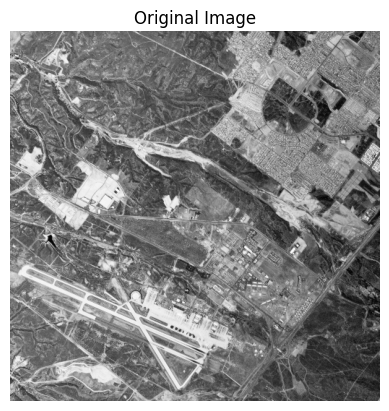

6.765358300711923
2.1683349609375


In [ ]:
eg1 = engine('/content/2.1.01.tiff',75,'eg60','eg60bit')
img1g = cv.imread("/content/2.1.01.tiff", cv.IMREAD_UNCHANGED)
img1g = cv.cvtColor(img1g, cv.COLOR_BGR2GRAY)
plt.imshow(img1g, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()
rmseg1 = rmse(eg1, img1g)
print(rmseg1)
bpeg1 = calculate_bpp('eg60bit', img1g.shape[0], img1g.shape[1])
print(bpeg1)

In [ ]:
# Compress using OpenCV's JPEG encoder
imagee = cv.imread("/content/2.1.01.tiff", cv.IMREAD_GRAYSCALE)
rowss, colss = imagee.shape[:2]
cv.imwrite("compressed.jpg", imagee, [cv.IMWRITE_JPEG_QUALITY, 75])
#eg1 = engine('/content/2.1.01.tiff',50,'cnhhh.jpg','cnhh.jpg')
compressed_size_bits = os.stat("compressed.jpg").st_size * 8
bpp = compressed_size_bits / (rowss * colss)
print(f"BPP for engine JPEG: {bpp}")


BPP for engine JPEG: 2.0679931640625


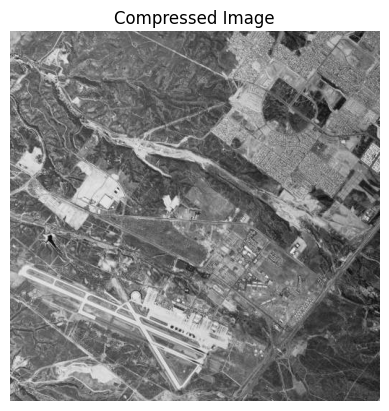

In [ ]:
plt.imshow(eg1, cmap='gray')
plt.title("Compressed Image")
plt.axis("off")
plt.show()

Original size: (512, 512), Padded size: ((512, 512)), Padding: (0, 0)
Compressed data written to compressed_Q30
Bitstreams written to out_Q30
DC: 19132 bits, AC: 246346 bits, DC_dict: 60 bits, AC_dict: 133 bits, Metadata: 54945 bits
Compressed data read from compressed_Q30
Original size: (512, 512), Padded size: ((512, 512)), Padding: (0, 0)
Compressed data written to compressed_Q40
Bitstreams written to out_Q40
DC: 20748 bits, AC: 296848 bits, DC_dict: 79 bits, AC_dict: 158 bits, Metadata: 67319 bits
Compressed data read from compressed_Q40
Original size: (512, 512), Padded size: ((512, 512)), Padding: (0, 0)
Compressed data written to compressed_Q50
Bitstreams written to out_Q50
DC: 22054 bits, AC: 341726 bits, DC_dict: 95 bits, AC_dict: 184 bits, Metadata: 79453 bits
Compressed data read from compressed_Q50
Original size: (512, 512), Padded size: ((512, 512)), Padding: (0, 0)
Compressed data written to compressed_Q60
Bitstreams written to out_Q60
DC: 23109 bits, AC: 383540 bits, DC_

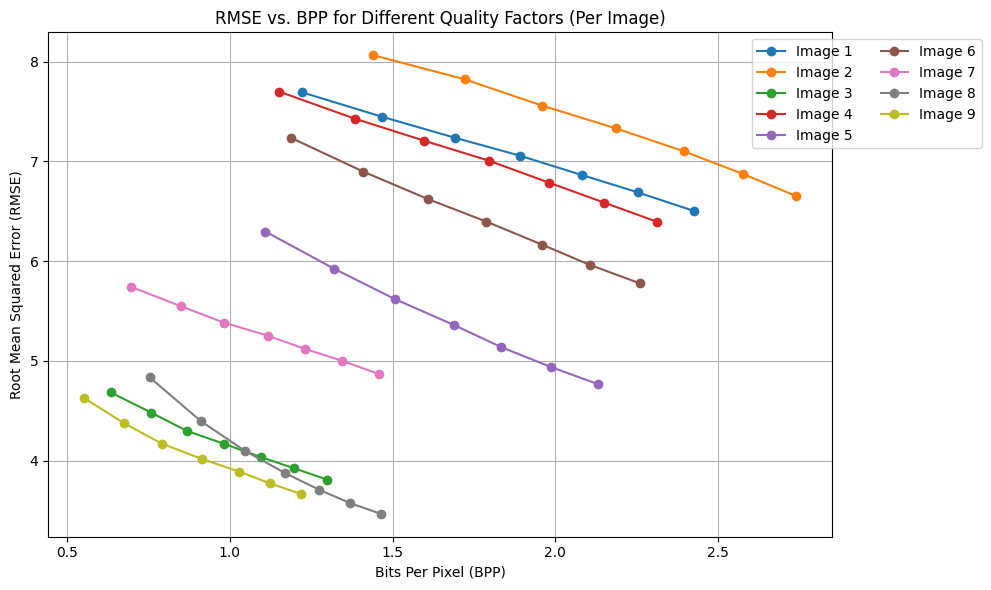

In [ ]:
def simulate_quality_factors(image_path, output_file_template, out2_template):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    rows, cols = img.shape[:2]
    quality_factors = [30,40,50, 60, 70, 80, 90]

    rmse_vals = []
    bpp_vals = []
    for Q in quality_factors:

        file_path = output_file_template.format(Q)
        out2 = out2_template.format(Q)
        reconstructed_image = engine(image_path, Q, file_path, out2)
        rmse_ = rmse(reconstructed_image, img)
        bpp = calculate_bpp(out2, rows, cols)
        rmse_vals.append(rmse_)
        bpp_vals.append(bpp)
    return rmse_vals, bpp_vals

# Prepare paths and store results
paths = [f'/content/2.1.0{i}.tiff' for i in range(1, 10)]
all_rmse_values = []
all_bpp_values = []

for path in paths:
    rmse_vals, bpp_vals = simulate_quality_factors(path, 'compressed_Q{}', 'out_Q{}')
    all_rmse_values.append(rmse_vals)
    all_bpp_values.append(bpp_vals)

# Plot RMSE vs. BPP for all images
plt.figure(figsize=(10, 6))
for i in range(len(paths)):
    plt.plot(all_bpp_values[i], all_rmse_values[i], marker='o', label=f'Image {i+1}')

plt.title('RMSE vs. BPP for Different Quality Factors (Per Image)')
plt.xlabel('Bits Per Pixel (BPP)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

## References
- OpenCV Docs https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga85aad4d668c01fbd64825f589e3696d4
- Numpy Docs https://numpy.org/doc/stable/reference/generated/numpy.array.html
-  OpenCV Docs https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html
- G4G https://www.geeksforgeeks.org/numpy-divide-python/
- G4G https://www.geeksforgeeks.org/numpy-round_-python/
- OpenCV Docs https://answers.opencv.org/question/9578/how-to-get-dct-of-an-image-in-python-using-opencv/
- G4G https://www.geeksforgeeks.org/bin-in-python/
- G4G https://www.geeksforgeeks.org/huffman-coding-greedy-algo-3/
- Stackoverflow https://stackoverflow.com/questions/41300583/how-to-create-a-frequency-matrix
- G4G https://www.geeksforgeeks.org/python-dictionary/
- G4G https://www.geeksforgeeks.org/change-the-dimension-of-a-numpy-array/?ref=lbp
- Stackoverflow https://stackoverflow.com/questions/11904083/how-to-get-image-size-bytes-using-pil